# Google platstore apps analysis


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
project_name = "Google-platstore-apps-analysis"

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rabibasukala01/google-platstore-apps-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/rabibasukala01/google-platstore-apps-analysis


'https://jovian.ai/rabibasukala01/google-platstore-apps-analysis'

## Data Preparation and Cleaning




In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
df=pd.read_csv("googleplaystore.csv")

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df.shape #eligible for assignment

(10841, 13)

# Data cleaning

In [11]:
df.isnull().sample(10) #some null value is present

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5139,False,False,False,False,False,False,False,False,False,False,False,False,False
2224,False,False,False,False,False,False,False,False,False,False,False,False,False
4524,False,False,False,False,False,False,False,False,False,False,False,False,False
409,False,False,False,False,False,False,False,False,False,False,False,False,False
8060,False,False,True,False,False,False,False,False,False,False,False,False,False
6800,False,False,True,False,False,False,False,False,False,False,False,False,False
8550,False,False,False,False,False,False,False,False,False,False,False,False,False
8932,False,False,False,False,False,False,False,False,False,False,False,False,False
8488,False,False,True,False,False,False,False,False,False,False,False,False,False
10602,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df.drop([10472],inplace=True)

In [14]:
df[10465:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [15]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3431,Horses Live Wallpaper,PERSONALIZATION,4.2,28806,7.1M,"1,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",18,4.1 and up
4035,FRONTLINE COMMANDO: D-DAY,GAME,4.5,1736105,14M,"10,000,000+",Free,0,Mature 17+,Action,"May 16, 2014",3.0.4,2.1 and up
6543,Bangla Calendar 1425: (EN-BN-AR) Holiday,LIFESTYLE,4.5,31,2.3M,"1,000+",Free,0,Everyone,Lifestyle,"April 21, 2018",2.1.0,4.1 and up
912,Crackle - Free TV & Movies,ENTERTAINMENT,3.7,388089,Varies with device,"10,000,000+",Free,0,Teen,Entertainment,"April 12, 2018",Varies with device,Varies with device
2300,Nursing Care Plan NANDA Tables,MEDICAL,3.0,4,3.4M,500+,Paid,$0.99,Everyone,Medical,"May 9, 2017",1,2.3.3 and up
8603,DN Prasad,FINANCE,NaN,0,5.9M,100+,Free,0,Everyone,Finance,"April 30, 2018",1.1.2,4.0.3 and up
8174,"Face Filter, Selfie Editor - Sweet Camera",PHOTOGRAPHY,4.7,142758,22M,"10,000,000+",Free,0,Everyone,Photography,"July 6, 2018",1.5.1,4.4 and up
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up
10014,Raytheon F-16 EW 360 VR,FAMILY,4.5,6,22M,500+,Free,0,Everyone,Entertainment,"June 9, 2017",1.0.01,4.4 and up
2552,Pinterest,SOCIAL,4.6,4305441,Varies with device,"100,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [16]:
df[df.Price>"1"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [17]:
df.drop(columns="Price",inplace=True) #dropping out price column because all values are 0 and no use of that column idk

In [18]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
# df.isnull().sum()
#df[df.isna().any(axis=1)]

In [20]:
df.Rating.median()

4.3

In [21]:
df["Rating"].fillna(df.Rating.median(), inplace = True)
#filling NaN values with median

In [22]:
df.isnull().sum() # no null valuesssss

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### still missing values are there: Type,current ver,Android Ver

In [23]:
df["Type"].fillna(str(df['Type'].mode().values[0]), inplace = True)   # most occuring value
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace = True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace = True)

In [24]:
df.isnull().sum()

# all missing values are cleared

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## 

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
df.Installs=df.Installs.apply(lambda x: str(x).replace("+","")if "+" in str(x)else str(x))
df.Installs=df.Installs.apply(lambda x: str(x).replace(",","")if "," in str(x)else str(x))
df.Installs=df.Installs.apply(lambda x: float(x))
df.Reviews=pd.to_numeric(df['Reviews'],errors='coerce')                            

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
df.describe()

,Rating,Reviews,Installs
count,10840.000000,1.084000e+04,1.084000e+04
mean,4.206476,4.441529e+05,1.546434e+07
std,0.480342,2.927761e+06,8.502936e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.100000,3.800000e+01,1.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.477550e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


In [29]:
import jovian

In [30]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rabibasukala01/google-platstore-apps-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/rabibasukala01/google-platstore-apps-analysis


'https://jovian.ai/rabibasukala01/google-platstore-apps-analysis'

## Exploratory Analysis and Visualization




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [32]:
var=df.groupby('Category')
a=var.Rating.mean()
b=var.Reviews.mean()
c=var.Installs.mean()


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

### visualization some contents


**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

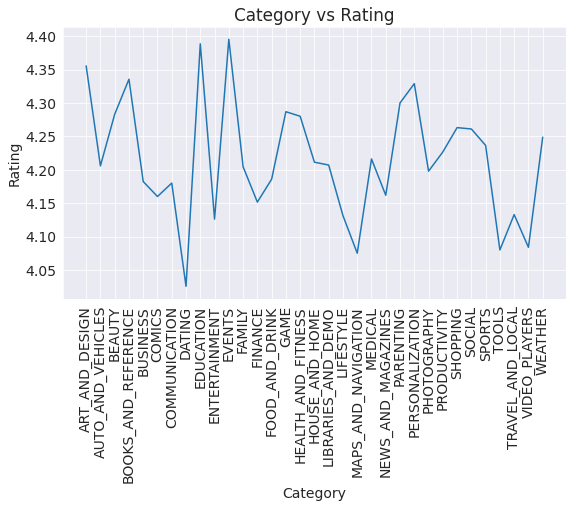

In [33]:
plt.plot(a);
plt.title('Category vs Rating')

plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=90);
plt.show()

In [35]:
#notice that event category app has highest rating after education category 

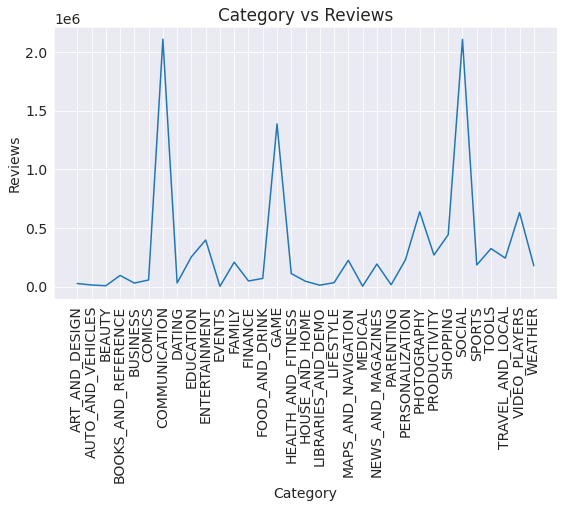

In [36]:
plt.plot(b);
plt.title('Category vs Reviews')

plt.xlabel("Category")
plt.ylabel("Reviews")
plt.xticks(rotation=90);
plt.show()

In [37]:
#social medias and communication have higher reviews . thats might becasuse of community that willing to improve to those category of app

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

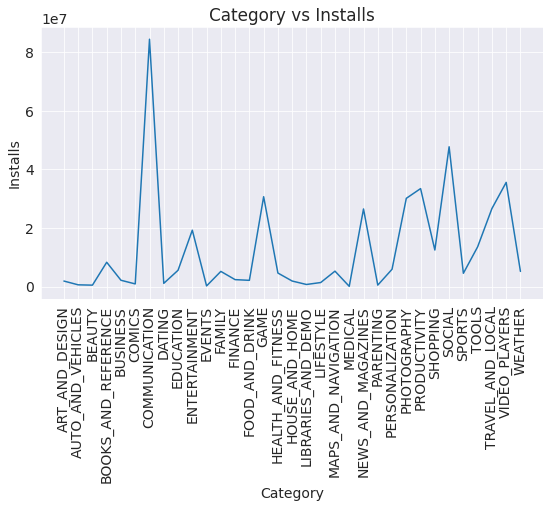

In [38]:
plt.plot(c);
plt.title('Category vs Installs')
plt.xlabel("Category")
plt.ylabel("Installs")
plt.xticks(rotation=90);
plt.show()

In [39]:
# todays world is a global village and it is possible with communication. thus communications app are more popular

In [40]:
gg=df.groupby('Genres').count()
gg

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Last Updated,Current Ver,Android Ver
Genres,,,,,,,,,,,
Action,365,365,365,365,365,365,365,365,365,365,365
Action;Action & Adventure,17,17,17,17,17,17,17,17,17,17,17
Adventure,75,75,75,75,75,75,75,75,75,75,75
Adventure;Action & Adventure,13,13,13,13,13,13,13,13,13,13,13
Adventure;Brain Games,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Video Players & Editors,173,173,173,173,173,173,173,173,173,173,173
Video Players & Editors;Creativity,2,2,2,2,2,2,2,2,2,2,2
Video Players & Editors;Music & Video,3,3,3,3,3,3,3,3,3,3,3


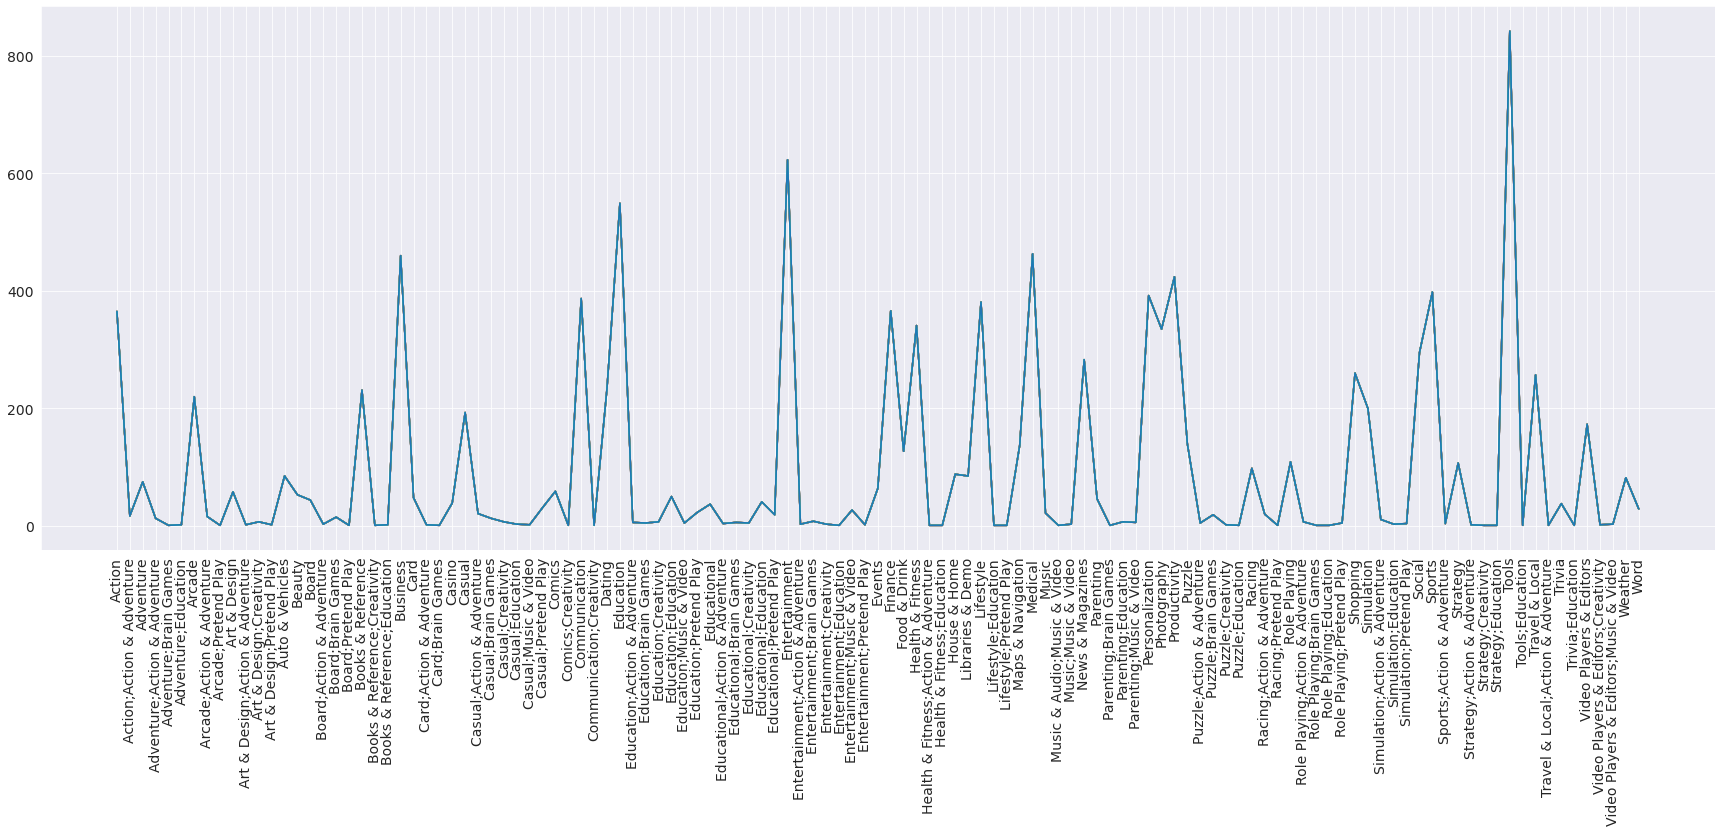

In [41]:
plt.figure(figsize=(30,10))
plt.plot(gg);
plt.xticks(rotation=90);

In [42]:
#overall tools Genres have highest allround content that might rating, installs etc

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rabibasukala01/google-platstore-apps-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/rabibasukala01/google-platstore-apps-analysis


'https://jovian.ai/rabibasukala01/google-platstore-apps-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: Which app got most installs and its type

In [45]:
appgroup=df.groupby(['App']).mean().sort_values('Installs',ascending=False)
appgroup.head()

,Rating,Reviews,Installs
App,,,
Google,4.4,8027558.0,1.000000e+09
Google Street View,4.2,2129698.0,1.000000e+09
Facebook,4.1,78143257.0,1.000000e+09
Subway Surfers,4.5,27721993.0,1.000000e+09
Skype - free IM & video calls,4.1,10484169.0,1.000000e+09


In [46]:
df[df.App=='Google'].Type

3234    Free
4150    Free
Name: Type, dtype: object

In [47]:
#obviosly google is most popular and trusted search engine . appx 90% use google .not suprised and is free of cost

#### which app hastop rating

In [48]:
rating=df.groupby(['App']).mean().sort_values('Rating',ascending=False)
rating.head()

,Rating,Reviews,Installs
App,,,
Dr Bk Sachin bhai,5.0,19.0,1000.0
Clinic Doctor EHr,5.0,2.0,5.0
EP Church Annapolis,5.0,2.0,100.0
Pyaar Ek Dhoka,5.0,18.0,50.0
Bacterial vaginosis Treatment - Sexual disease,5.0,2.0,500.0


In [49]:
#i dont know why (Dr Bk Sachin bhai) have top rating . It because number of installation are low and all rating are done by 
# their friend.

#### Q3: which app got most reviews

In [50]:
df.Size=df.Installs.apply(lambda x: str(x).replace("M",""))
df.Size=df.Size.apply(lambda x: float(x))


In [51]:
df.sort_values("Reviews",ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,1.000000e+09,1.000000e+09,Free,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,1.000000e+09,1.000000e+09,Free,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.000000e+09,1.000000e+09,Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.000000e+09,1.000000e+09,Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,1.000000e+09,1.000000e+09,Free,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
9713,eP Finder,AUTO_AND_VEHICLES,4.3,0,1.000000e+01,1.000000e+01,Free,Everyone,Auto & Vehicles,"June 21, 2018",1,4.4 and up
8495,HDWallpaper DK,PERSONALIZATION,4.3,0,1.000000e+01,1.000000e+01,Free,Teen,Personalization,"October 5, 2017",1,4.0 and up
6277,Bi-Tank Ads Free,GAME,4.3,0,1.000000e+00,1.000000e+00,Paid,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up
8489,DK Primrose for KLWP,PERSONALIZATION,4.3,0,1.000000e+00,1.000000e+00,Paid,Everyone,Personalization,"December 2, 2017",v2017.Dec.01.19,4.4 and up


In [52]:
# Facebook has most reviews because it is one of the most popular social platform 
# advertising, messenging,entertainment and many more feature makes people to improve facebook platform as it is also easy
# to use. for this they reviews fb 

#### Q4: which app hold more 18+ app

In [53]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [54]:
df.loc[df["Content Rating"] == 'Adults only 18+']

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,500000.0,500000.0,Free,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,1000000.0,1000000.0,Free,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,500000.0,500000.0,Free,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [55]:
# top 18+ content is in comics

In [56]:
import jovian

In [57]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "rabibasukala01/google-platstore-apps-analysis" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/rabibasukala01/google-platstore-apps-analysis


'https://jovian.ai/rabibasukala01/google-platstore-apps-analysis'

## Inferences and Conclusion

simple analysis og apps from google playstore

In [58]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work



In [ ]:
import jovian

In [ ]:
# solve missing values:https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
# youtube:https://www.youtube.com/watch?v=exqjWW3_BTY
# discussion forum:https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project

In [ ]:
jovian.commit()